In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob

In [10]:
def read_xy(path: str):
    df = pd.read_csv(path)
    df['N'] = df.index + 1
    df['r'] = (df.x ** 2 + df.y ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df


def read_r3(path: str):
    df = pd.read_csv(path)
    df['N'] = df.index + 1
    df['r'] = (df.r0 ** 2 + df.r1 ** 2 + df.r2 ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df

In [13]:
def read_all(load_dir: str, reader):
    paths = glob(f'{load_dir}/*.csv')
    return [reader(path) for path in paths]

In [5]:
a = read_r3("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-3d-1/1/1.csv")
a

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


r0  r1  r2     N          r         cr        fd
0      0   0   0     1   0.000000   0.000000 -0.000000
1      1   0   0     2   1.000000   1.000000       inf
2      0   0   1     3   1.000000   1.000000       inf
3     -1   0   1     4   1.414214   1.414214  4.000000
4      1   0   1     5   1.414214   1.414214  4.643856
...   ..  ..  ..   ...        ...        ...       ...
1995  66  13  30  1996  73.654599  76.720271  1.750832
1996  56  19  29  1997  65.863495  76.720271  1.750947
1997  68  17  26  1998  74.759615  76.720271  1.751063
1998  52  22  36  1999  66.962676  76.720271  1.751178
1999  62   6  17  2000  64.567794  76.720271  1.751293

[2000 rows x 7 columns]

In [19]:
c2 = read_all('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/minimal-viable-alteration',
              read_xy)
r2 = read_all('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-sticking-probability/1',
              read_xy)
r3 = read_all('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-3d-2/1', read_r3)

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

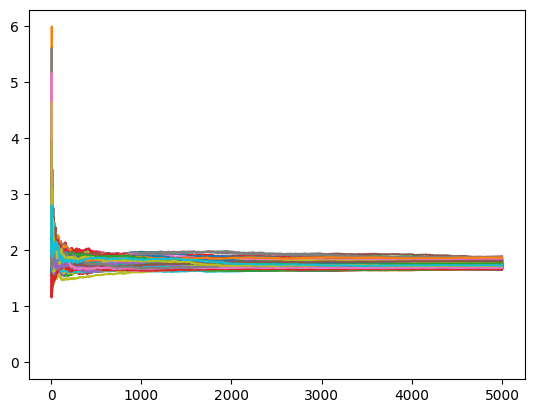

In [20]:
for df in c2:
    plt.plot(df.N, df.fd)

for df in r3:
    plt.plot(df.N, df.fd)

plt.show()

In [8]:
def convergent_tail_index(series, tol):
    diffs = np.abs(np.ediff1d(series))
    for i in range(0, len(diffs)):
        if np.max(diffs[i:]) <= tol:
            return i

    # No convergence found
    return None

In [9]:
def compute_fd(df, tol=0.05):
    tail_index = convergent_tail_index(df.fd, tol)
    return np.mean(df.fd[tail_index:]), np.std(df.fd[tail_index:])

In [21]:
fds = [compute_fd(df, 0.001) for df in r3]
fds_clean = [f for f in fds if f[0] < np.inf]

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


In [22]:
means, stds = list(zip(*fds_clean))

In [23]:
np.mean(means), np.std(means)

(1.7492904252145536, 0.05705396524689619)

In [25]:
a = read_r3("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/others/dla/dla.csv")

In [26]:
a.sort_values('fd', inplace=True)

In [33]:
a[(a.r0 == 0) & (a.r1 == 0)]

r0  r1  r2     N     r         cr        fd
3832   0   0  10  3833  10.0  60.241182  2.013345
3854   0   0   0  3855   0.0  60.241182  2.014741
3865   0   0   2  3866   2.0  60.241182  2.015436
5818   0   0 -12  5819  12.0  60.241182  2.115210

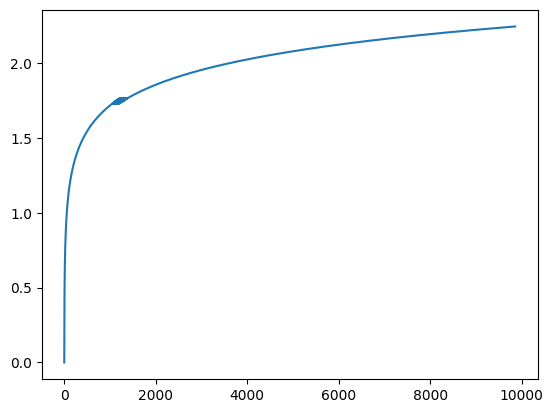

In [34]:
plt.plot(a.fd)

In [3]:
big = pd.read_json("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/rust-codebase/balls-10000.json")

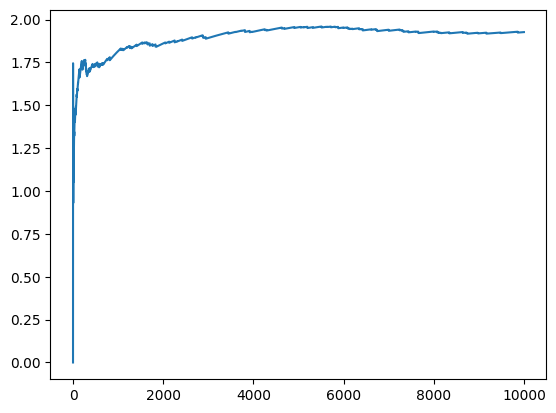

In [7]:
plt.plot(big.fd.index, big.fd)

In [39]:
spm = read_xy("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/rust-codebase/spm.csv")

In [40]:
spm['angle'] = np.arctan2(spm.y, spm.x)

<Axes: >

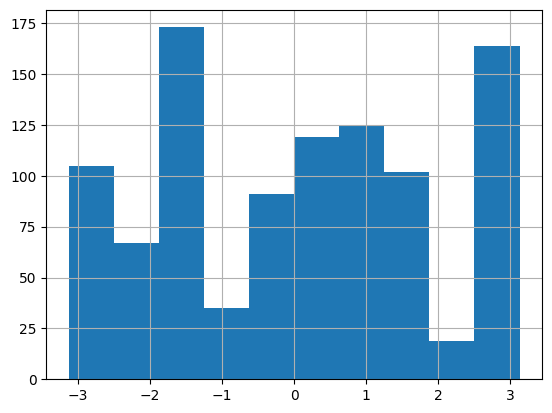

In [49]:
spm.angle.hist()

<Axes: >

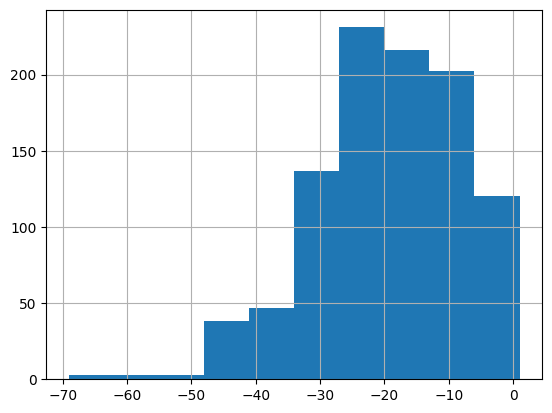

In [63]:
(spm.r - 78.31347265956222).hist()

In [32]:
ayx

(0       (9.149, 12.724]
 1       (9.149, 12.724]
 2      (12.724, 16.229]
 3      (16.229, 19.733]
 4      (19.733, 23.238]
              ...       
 995    (61.787, 65.292]
 996    (65.292, 68.796]
 997    (65.292, 68.796]
 998     (40.76, 44.265]
 999    (65.292, 68.796]
 Name: r, Length: 1000, dtype: category
 Categories (20, interval[float64, right]): [(9.149, 12.724] < (12.724, 16.229] < (16.229, 19.733] < (19.733, 23.238] ... (65.292, 68.796] < (68.796, 72.301] < (72.301, 75.805] < (75.805, 79.31]],
 array([ 9.14945448, 12.72404325, 16.22854204, 19.73304082, 23.23753961,
        26.7420384 , 30.24653719, 33.75103598, 37.25553477, 40.76003356,
        44.26453235, 47.76903114, 51.27352992, 54.77802871, 58.2825275 ,
        61.78702629, 65.29152508, 68.79602387, 72.30052266, 75.80502145,
        79.30952024]))

In [37]:
np.arctan2()

<ufunc 'arctan2'>

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

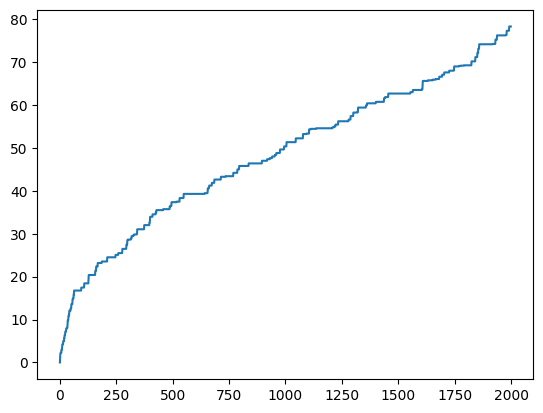

In [62]:
read_xy(
    "/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/stick-probability/1/5.csv").cr.plot()

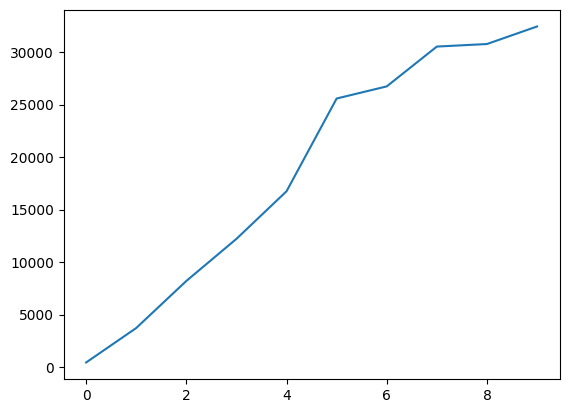

In [68]:
plt.plot([
    432,
    3717,
    8199,
    12209,
    16745,
    25579,
    26734,
    30528,
    30770,
    32442,
])

In [93]:
h1, h2 = (list(zip(*[[406, 1000],
[3466, 2000],
[7719, 3000],
[11442, 4000],
[15635, 5000],
[21632, 6000],
[24696, 7000],
[28303, 8000],
[27905, 9000],
[28933, 10000],
[31787, 11000],
[36140, 12000],
[41352, 13000],
[43140, 14000],
[46663, 15000],
[48157, 16000],
[57204, 17000],
[65092, 18000],
[68475, 19000],
[78264, 20000],
[81744, 21000],
[88951, 22000],
[101656, 23000],
[118312, 24000],
[117773, 25000],
[129479, 26000],
[134337, 27000],
[137298, 28000],
[151589, 29000],
[162733, 30000],
[157718, 31000],
[170786, 32000],
[169535, 33000],
[177893, 34000],
[179300, 35000],
[175627, 36000],
[202971, 37000],
[232027, 38000],
[231474, 39000],
[232526, 40000],
[255812, 41000],
[264559, 42000],
[270349, 43000]])))

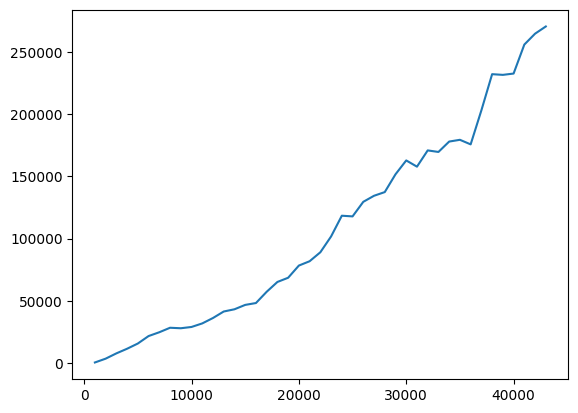

In [94]:
plt.plot(list(h2), list(h1))

In [113]:
p, _ = scipy.optimize.curve_fit(m, list(h2), list(h1))
p

/var/folders/yz/hjlw4lyn3rq0s5y_r82b55cw0000gn/T/ipykernel_87087/2826574253.py:2: RuntimeWarning: invalid value encountered in log
  return a * x * np.log(x * b)


array([2.41394321e+00, 2.82344150e-04])

In [112]:
def m(x, a, b):
    return a * x * np.log(x * b)

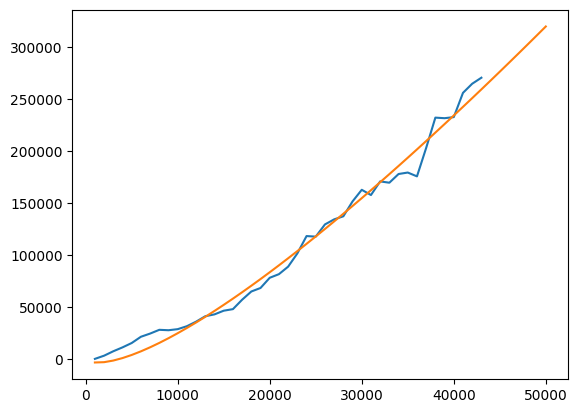

In [114]:
plt.plot(list(h2), list(h1))
plt.plot(np.linspace(1000, 50000), m(np.linspace(1000, 50000), *p))